## Table of Contents

- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Read or Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Target Variable](#2.1)
    - [2.2 Features Correlation with Target](#2.2)
    - [2.3 Feature Variable](#2.3)
        - [2.3.1 Alcohol](#2.3.1)
        - [2.3.2 Volatile Acidity](#2.3.2)
        - [2.3.3 Residual Sugar](#2.3.3)
    - [2.4 Multicollinearity](#2.4)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
- [4. Model](#4)
    - [4.1 Logistic Regression](#4.1)
    - [4.2 Random Forest](#4.2)
- [5. Conclusion](#5)

<a name='1'></a>
# 1. Introduction

<a name='1.1'></a>
## 1.1 Problem Statement

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

<a name='1.2'></a>
## 1.2 Packages

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<a name='1.3'></a>
## 1.3 Read or Import

In [5]:
df = pd.read_csv("teleCust1000t.csv")

<a name='1.4'></a>
## 1.4 Data Summary

In [6]:
# take a look at the dataset
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


As we can see all variables are numerical

In [8]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 12 numerical features:
 ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']


In [9]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 0 categorical features:
 []


<a name='2'></a>
# 2. Exploratory Data Analysis

<a name='2.1'></a>
## 2.1 Dependent or Target Variable

There are four output categories which are , Basic-service (1), E-Service customers (2), Plus Service (3), and Total Service (4). Seems like these four categories equally distributed.

In [10]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

## 2.2 Independent or Response Variables

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

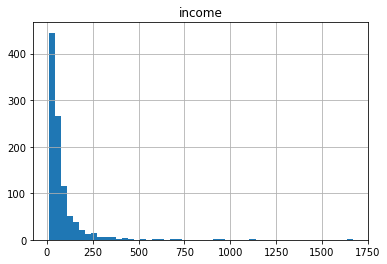

In [28]:
df.hist(column='income', bins=50)

<a name='1.5'></a>
# 3. Data Preparation for Predictive Analysis

<a name='1.5'></a>
## 3.1 Data Adjustment

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [12]:
df[0:3]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3


In [13]:
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [14]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

<a name='1.5'></a>
## 3.2 Data Normalization (Standardization)

Normalize Data
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [15]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

<a name='1.5'></a>
## 3.3 Data Split

In [16]:
from sklearn.model_selection import train_test_split

#80/20 split
train_x, test_x, train_y, test_y = train_test_split( x, y, test_size=0.2, random_state=4)

print(f'train_x: {train_x.shape} ({round(len(train_x)/len(df), 1) * 100}%)')
print(f'train_y: {train_y.shape} ({round(len(train_y)/len(df), 1) * 100}%)')
print(f'test_x: {test_x.shape} ({round(len(test_x)/len(df), 1) * 100}%)')
print(f'test_y: {test_y.shape} ({round(len(test_y)/len(df), 1) * 100}%)')

train_x: (800, 11) (80.0%)
train_y: (800,) (80.0%)
test_x: (200, 11) (20.0%)
test_y: (200,) (20.0%)


<a name='4'></a>
# 4. Model

<a name='4'></a>
## 4.1 Train

In [156]:
from sklearn.neighbors import KNeighborsClassifier

k = 16
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(train_x,train_y)
neigh

KNeighborsClassifier(n_neighbors=16)

<a name='4'></a>
## 4.2 Test

In [157]:
yhat = neigh.predict(test_x)
yhat[0:5]

array([3, 2, 4, 4, 4], dtype=int64)

<a name='5'></a>
# 5. Model Evaluation

In [158]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(train_y, neigh.predict(train_x)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat))

Train set Accuracy:  0.45375
Test set Accuracy:  0.36


<a name='5'></a>
# 6. K between 1 and 50 (Model Train, Model Test, Model Evaluation)

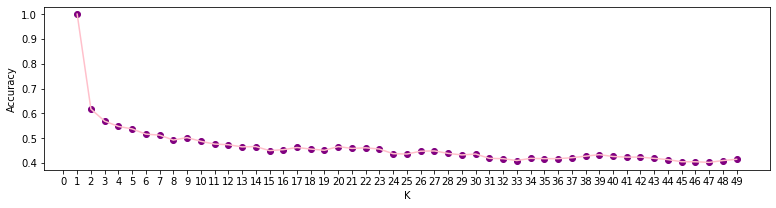

In [154]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,50)
accuracy = []
#Train Model and Predict  
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(train_x, train_y)
    yhat_train = neigh.predict(train_x)
    accuracy.append(metrics.accuracy_score(train_y, yhat_train))
    
plt.figure(figsize=(13,3))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, accuracy, color='purple')
plt.plot(k_range, accuracy, color='pink')
plt.xticks(range(0,50));

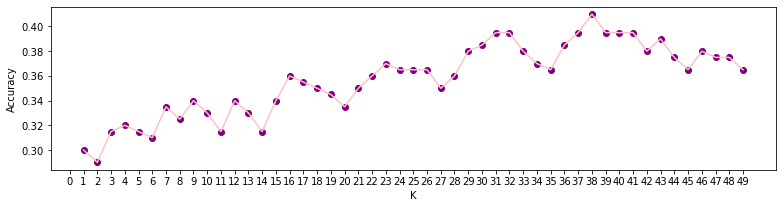

In [155]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,50)
accuracy = []
#Train Model and Predict  
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(train_x, train_y)
    yhat = neigh.predict(test_x)
    accuracy.append(metrics.accuracy_score(test_y, yhat))
    
plt.figure(figsize=(13,3))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, accuracy, color='purple')
plt.plot(k_range, accuracy, color='pink')
plt.xticks(range(0,50));

<a name='5'></a>
# 7. Conclusion

It shown that looping the value K is a better way to find the optimum value. From the model we can know that we get the optimum value when the K is 38. The train and test accuracy reached 42.75% and 41.00% respectively

In [168]:
neigh = KNeighborsClassifier(n_neighbors = 38).fit(train_x,train_y)
yhat = neigh.predict(test_x)
print("Train set Accuracy: ", metrics.accuracy_score(train_y, neigh.predict(train_x)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat))

Train set Accuracy:  0.4275
Test set Accuracy:  0.41


In [169]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [170]:
drugTree.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [171]:
predTree = drugTree.predict(test_x)

In [172]:
print (predTree [0:9])
print (test_y [0:9])

[1 1 4 4 4 2 3 1 3]
[4 1 1 2 4 4 3 1 3]


In [173]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(test_y, predTree))

DecisionTrees's Accuracy:  0.375
